# Implementação Regressão Linear

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

### Criando Dados

In [4]:
np.random.seed(42)

X = np.random.uniform(0, 8, 50)
bias = np.random.rand(50)
y = 3 * X + 2 + bias

print(X.shape, y.shape)

(50,) (50,)


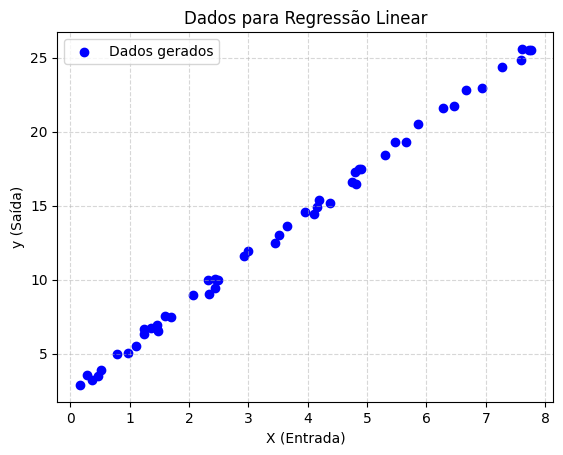

In [5]:
plt.scatter(X, y, color='blue', label='Dados gerados')

plt.title('Dados para Regressão Linear')
plt.xlabel('X (Entrada)')
plt.ylabel('y (Saída)')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

### Divisão Dados

In [6]:
treino = int(0.8 * len(X))

X_train = X[:treino]
y_train = y[:treino]

X_test = X[treino:]
y_test = y[treino:]

print(f"Tamanho do treino: {len(X_train)}, Tamanho do teste: {len(X_test)}")

Tamanho do treino: 40, Tamanho do teste: 10


In [7]:
class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr  # taxa de aprendizado
        self.epochs = epochs  # número de iterações do gradiente descendente
        self.w = None  # pesos (coeficientes)
        self.b = None  # intercepto (bias)

    def fit(self, X, y):
        """Treina o modelo usando Gradiente Descendente"""
        X = X.reshape(-1, 1)  # garante que X seja uma matriz (se for vetor)
        n_samples, n_features = X.shape
        
        # inicializa pesos e bias com zeros
        self.w = np.zeros(n_features)
        self.b = 0

        # gradiente descendente
        for _ in range(self.epochs):
            # predições
            y_pred = np.dot(X, self.w) + self.b
            
            # cálculo dos gradientes
            dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))  # gradiente dos pesos
            db = (2 / n_samples) * np.sum(y_pred - y)  # gradiente do bias
            
            # atualização dos parâmetros
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        """Faz previsões"""
        X = X.reshape(-1, 1)  # garante que X tenha formato correto
        return np.dot(X, self.w) + self.b

    def score(self, X, y):
        """Calcula o Erro Quadrático Médio (MSE)"""
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)

In [8]:
modelo = LinearRegression(lr=0.01, epochs=1000)
modelo.fit(X_train, y_train)

# testando o modelo
y_pred = modelo.predict(X_test)

# avaliação
mse = modelo.score(X_test, y_test)
print(f"MSE no conjunto de teste: {mse:.4f}")
print(f"Peso aprendido: {modelo.w[0]:.4f}, Bias aprendido: {modelo.b:.4f}")

MSE no conjunto de teste: 0.0719
Peso aprendido: 3.0093, Bias aprendido: 2.4695


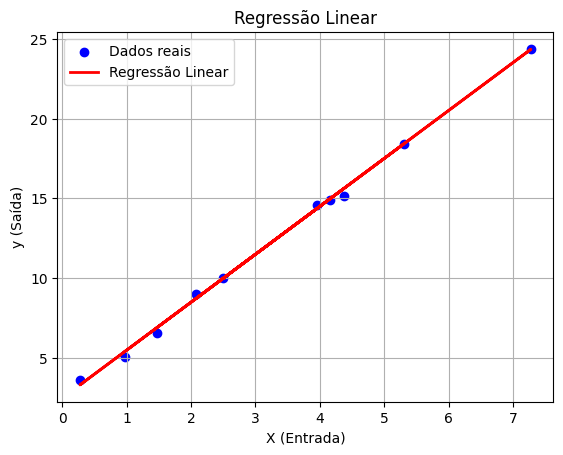

In [10]:
plt.scatter(X_test, y_test, color="blue", label="Dados reais")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title("Regressão Linear")
plt.xlabel("X (Entrada)")
plt.ylabel("y (Saída)")
plt.legend()
plt.grid()
plt.show()